In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

# Random Forest

In [3]:
cd ~/Desktop/Tesis/Notebooks-Git/Training/StickSlip

/home/luis/Desktop/Tesis/Notebooks-Git/Training/StickSlip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns

In [5]:
df = pd.read_csv("TrainingVss.csv")

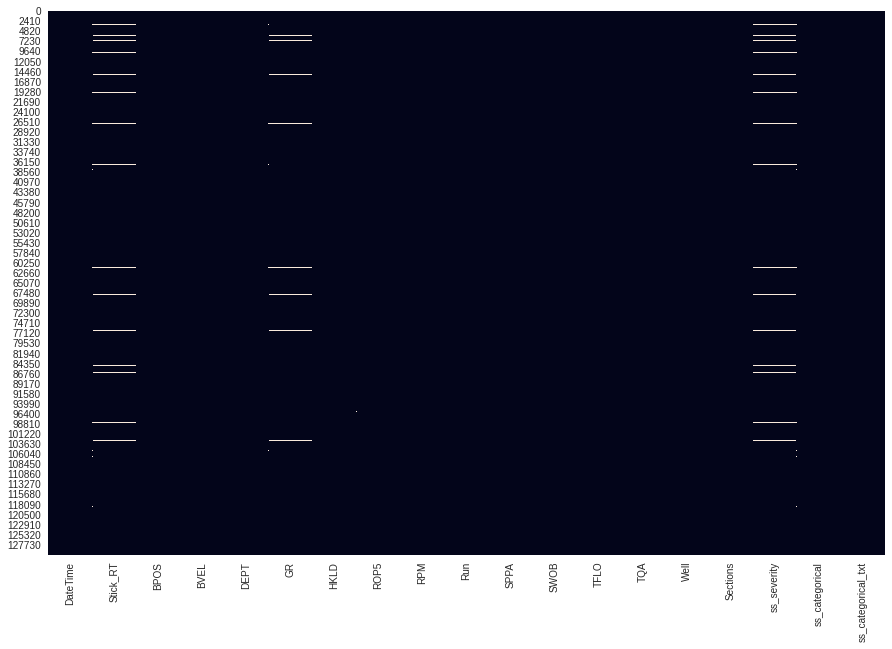

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [7]:
df.dropna(inplace=True)

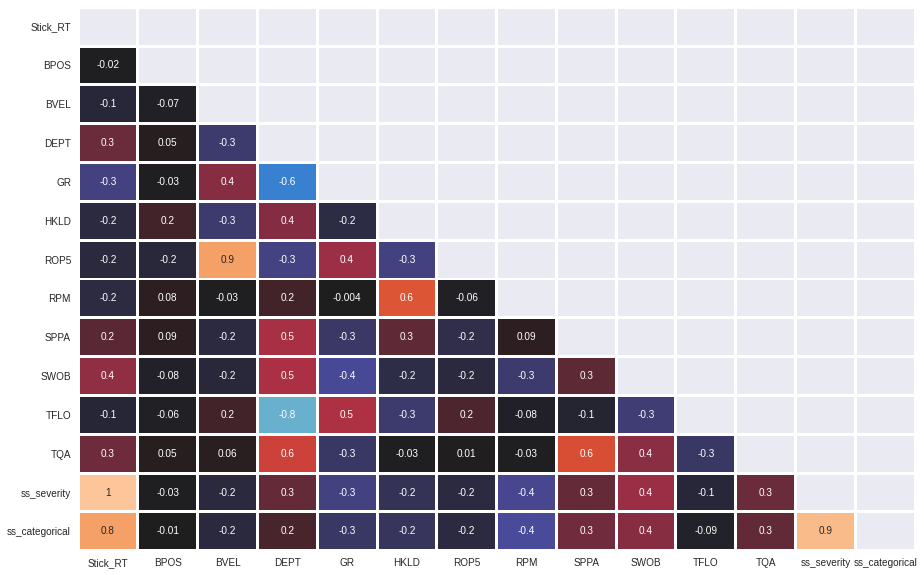

In [8]:
plt.figure(figsize=(15,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix,fmt = '.1g',linewidths=2,vmin=-1, vmax=1, center= 0,cbar=False)
plt.show()

In [9]:
df.columns

Index(['DateTime', 'Stick_RT', 'BPOS', 'BVEL', 'DEPT', 'GR', 'HKLD', 'ROP5',
       'RPM', 'Run', 'SPPA', 'SWOB', 'TFLO', 'TQA', 'Well', 'Sections',
       'ss_severity', 'ss_categorical', 'ss_categorical_txt'],
      dtype='object')

## Splitting sets

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_cols = df.columns.difference(['Well','Sections','ss_severity','ss_categorical','ss_categorical_txt',"DateTime","Run"])

In [12]:
X = df[x_cols]
Y = df["ss_categorical"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=2)

In [13]:
print("Predictors:\n\t",x_cols)
print("\nSet shapes:\t")
print("\tTraining:\n\t\tX:",x_train.shape,"\n\t\tY:",y_train.shape)
print("\tTesting:\n\t\tX:",x_test.shape,"\n\t\tY:",y_test.shape)

Predictors:
	 Index(['BPOS', 'BVEL', 'DEPT', 'GR', 'HKLD', 'ROP5', 'RPM', 'SPPA', 'SWOB',
       'Stick_RT', 'TFLO', 'TQA'],
      dtype='object')

Set shapes:	
	Training:
		X: (100938, 12) 
		Y: (100938,)
	Testing:
		X: (25235, 12) 
		Y: (25235,)


## Random Forest Classifier
for training set

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
%%time
rf = RandomForestClassifier(n_estimators=100,max_depth=None, min_samples_split=4, min_samples_leaf=2,max_features='auto', bootstrap=True, n_jobs=-1,random_state=2).fit(x_train,y_train)

CPU times: user 1min 2s, sys: 307 ms, total: 1min 3s
Wall time: 24.5 s


In [16]:
y_pred = rf.predict(x_test)

In [17]:
print("Accuracy:",round((accuracy_score(y_test, y_pred)*100),4),"%")

Accuracy: 99.9485 %


In [18]:
feat = np.sort(rf.feature_importances_)

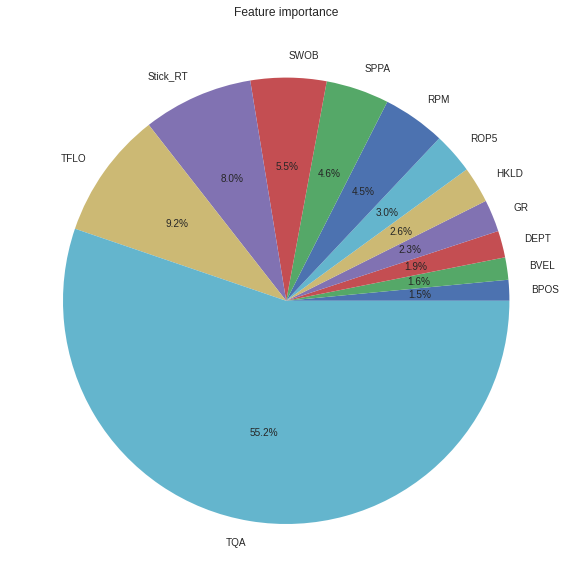

In [19]:
plt.figure(figsize=(10,15))
plt.pie(feat,labels=x_cols,autopct='%1.1f%%')
plt.title("Feature importance")
plt.show()

## Prediction

In [20]:
df_rf = df
df_rf["Count"] = np.arange(len(df))

In [21]:
df_rf["rf"] = rf.predict(X)

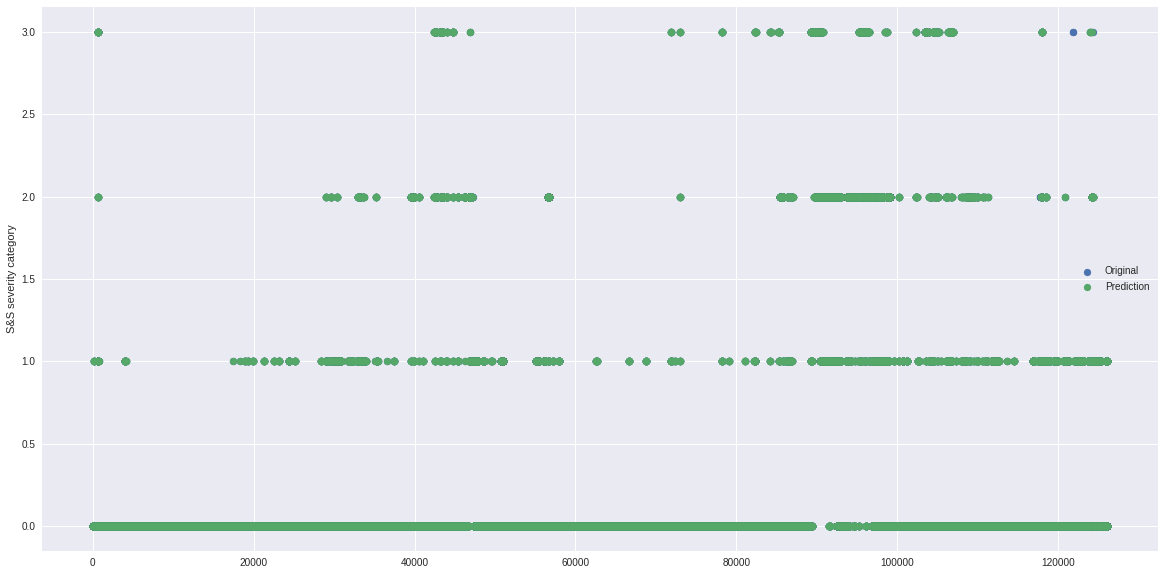

In [22]:
plt.figure(figsize = (20,10))
plt.scatter(df_rf["Count"],df_rf["ss_categorical"],label="Original")
plt.scatter(df_rf["Count"],df_rf["rf"],label="Prediction")
plt.ylabel("S&S severity category")
plt.legend()
plt.show()

## ROC Curve

In [23]:
from sklearn.metrics import classification_report

In [24]:
report = classification_report(y_test,y_pred)

In [25]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22207
           1       0.99      1.00      1.00      1175
           2       1.00      1.00      1.00      1455
           3       1.00      0.99      0.99       398

    accuracy                           1.00     25235
   macro avg       1.00      1.00      1.00     25235
weighted avg       1.00      1.00      1.00     25235



In [26]:
probas = rf.predict_proba(x_test)

In [27]:
from sklearn.metrics import roc_curve, auc

# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)

In [28]:
# get area under the curve
roc_auc = auc(fpr, tpr)

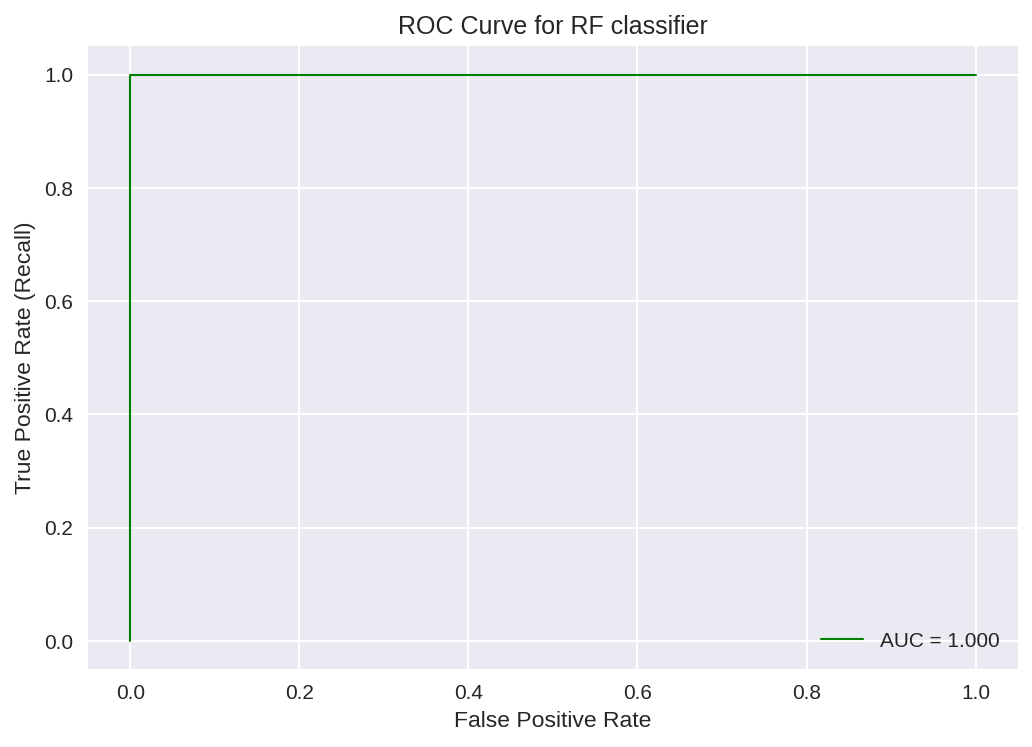

In [29]:
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

# Blind Set
predicting F-10 well


In [37]:
bl = pd.read_csv(r"BlindSet.csv")

In [38]:
bl.head()

,DEPT,BPOS,BVEL,GR,HKLD,ROP5,SWOB,RPM,TQA,SPPA,TFLO,Stick_RT,DateTime,Well,Run,ss_severity,ss_categorical,ss_categorical_txt
0,1104.8008,39.9192,0.0021,34.3871,100.2842,7.9547,6.72,203.0,12.7988,148.9276,3981.0049,75.0,2009-04-13 20:16:49,F-10,run_2,18.472906,0,None or Low
1,1104.8294,39.8910,0.0034,34.3871,100.0538,7.9547,6.95,204.0,13.3826,147.3801,3981.0049,75.0,2009-04-13 20:16:59,F-10,run_2,18.382353,0,None or Low
2,1104.8713,39.8494,0.0049,40.1183,100.0407,7.9547,6.96,204.0,16.3141,148.6527,3981.0049,45.0,2009-04-13 20:17:09,F-10,run_2,11.029412,0,None or Low
3,1104.9110,39.8093,0.0042,40.1183,99.1559,10.4199,7.85,203.0,15.8104,151.1948,3981.0049,45.0,2009-04-13 20:17:19,F-10,run_2,11.083744,0,None or Low
4,1104.9438,39.7767,0.0034,28.6559,98.8223,10.4199,8.18,203.0,15.8104,151.1948,3981.0049,9.0,2009-04-13 20:17:29,F-10,run_2,2.216749,0,None or Low


In [39]:
bl_predict = pd.DataFrame(bl,columns=x_test.columns)

In [42]:
bl_predict.head()

,BPOS,BVEL,DEPT,GR,HKLD,ROP5,RPM,SPPA,SWOB,Stick_RT,TFLO,TQA
0,39.9192,0.0021,1104.8008,34.3871,100.2842,7.9547,203.0,148.9276,6.72,75.0,3981.0049,12.7988
1,39.8910,0.0034,1104.8294,34.3871,100.0538,7.9547,204.0,147.3801,6.95,75.0,3981.0049,13.3826
2,39.8494,0.0049,1104.8713,40.1183,100.0407,7.9547,204.0,148.6527,6.96,45.0,3981.0049,16.3141
3,39.8093,0.0042,1104.9110,40.1183,99.1559,10.4199,203.0,151.1948,7.85,45.0,3981.0049,15.8104
4,39.7767,0.0034,1104.9438,28.6559,98.8223,10.4199,203.0,151.1948,8.18,9.0,3981.0049,15.8104


In [43]:
print("Predictors:\n\t",bl_predict.columns)
print("\nSet shape:",bl_predict.shape)

Predictors:
	 Index(['BPOS', 'BVEL', 'DEPT', 'GR', 'HKLD', 'ROP5', 'RPM', 'SPPA', 'SWOB',
       'Stick_RT', 'TFLO', 'TQA'],
      dtype='object')

Set shape: (58997, 12)


In [44]:
y_bl = pd.to_numeric(bl["ss_categorical"])

In [45]:
bl_pred = rf.predict(bl_predict)
bl["Prediction"] = bl_pred

In [46]:
print("Accuracy:",round((accuracy_score(y_bl, bl_pred)*100),4),"%")

Accuracy: 96.8439 %


In [49]:
bl["Count"] = np.arange(len(bl))

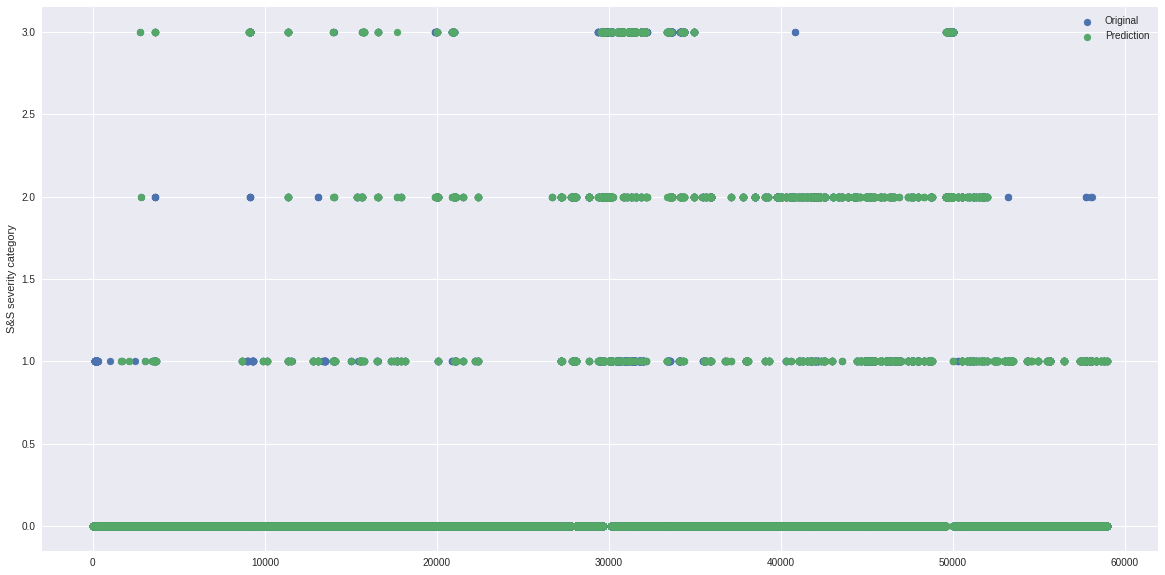

In [50]:
plt.figure(figsize = (20,10))
plt.scatter(bl["Count"],bl["ss_categorical"],label="Original")
plt.scatter(bl["Count"],bl["Prediction"],label="Prediction")
plt.ylabel("S&S severity category")
plt.legend()
plt.show()

In [51]:
bl.columns

Index(['DEPT', 'BPOS', 'BVEL', 'GR', 'HKLD', 'ROP5', 'SWOB', 'RPM', 'TQA',
       'SPPA', 'TFLO', 'Stick_RT', 'DateTime', 'Well', 'Run', 'ss_severity',
       'ss_categorical', 'ss_categorical_txt', 'Prediction', 'Count'],
      dtype='object')

In [69]:
def depth_plts(data,list_):
    plt.style.use("bmh")
    fig,axes = plt.subplots(1,len(list_),figsize=(10,12),sharey=True)
    for i,log in enumerate(list_):
        axes[i].scatter(data[list_[i]],data["DEPT"],marker = "*",s = 0.5,color="steelblue")
        axes[i].set_xlabel(log,fontsize=15)
        axes[i].invert_yaxis()
        if log == "ss_categorical":
            axes[i].scatter(data[list_[i]],data["DEPT"],marker = "*",color="steelblue",s = 1,label = "Original")
            axes[i].scatter(data["Prediction"],data["DEPT"],marker = "*",label = "Predicion",s = 1,color = "red",alpha=.6)
            axes[i].set_xlabel(log,fontsize=15)
            axes[i].legend()
            #axes[i].invert_yaxis()
            
    axes[0].set_ylabel("Depth",fontsize=15)
    plt.tight_layout()

<ipython-input-69-8a2b0528fea9>:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/luis/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


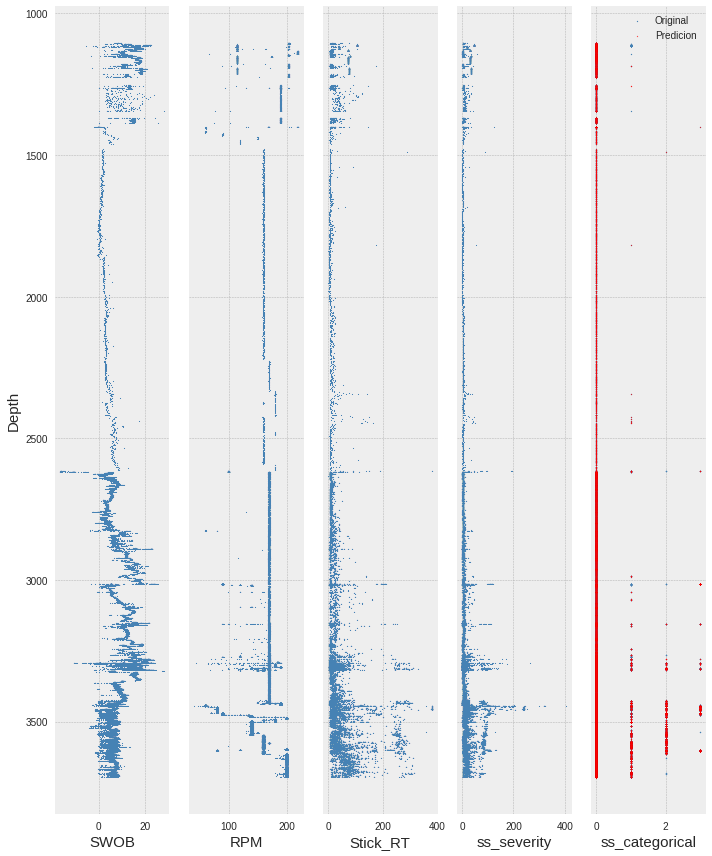

In [70]:
depth_plts(bl,["SWOB","RPM","Stick_RT","ss_severity","ss_categorical"])